# *** *** *** *** *** *** *** *** *** *** *** *** *** 
# *** *** *** *** *** *** *** *** *** *** *** *** *** 

In [1]:
#匯入套件
import pandas as pd
import matplotlib.pyplot as plt  

In [2]:
# 讀入 csv 文字檔
csv_file = "002_Dard_artical2_5.csv"
input_artical = pd.read_csv(csv_file) 
input_artical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381889 entries, 0 to 381888
Data columns (total 45 columns):
Unnamed: 0              381889 non-null int64
Unnamed: 0.1            381889 non-null int64
anonymousDepartment     381889 non-null bool
anonymousSchool         381889 non-null bool
commentCount            381889 non-null float64
content                 381889 non-null object
createdAt               381889 non-null object
customStyle             323 non-null object
department              147425 non-null object
error                   0 non-null float64
error_description       0 non-null float64
excerpt                 364967 non-null object
forumAlias              381889 non-null object
forumId                 381889 non-null object
forumName               381889 non-null object
gender                  381879 non-null object
hidden                  381889 non-null bool
hiddenByAuthor          381889 non-null bool
id                      381889 non-null float64
isSuspiciousAcc

In [3]:
#資料庫最早文章ID及時間
input_artical[['id', 'createdAt']].head()

,id,createdAt
0,231979739.0,2019-09-01T00:00:43.168Z
1,231979740.0,2019-09-01T00:02:08.991Z
2,231979741.0,2019-09-01T00:02:40.197Z
3,231979743.0,2019-09-01T00:05:27.739Z
4,231979744.0,2019-09-01T00:05:34.495Z


In [4]:
#資料庫最後文章ID及時間
input_artical[['id', 'createdAt']].tail()

,id,createdAt
381884,232539733.0,2019-11-20T14:26:06.451Z
381885,232539734.0,2019-11-20T14:26:17.118Z
381886,232539735.0,2019-11-20T14:26:30.402Z
381887,232539737.0,2019-11-20T14:26:54.747Z
381888,232539738.0,2019-11-20T14:26:59.340Z


### 選取
1. 時間區間
2019/9/1 ~ 11/15

2. 重要欄位: 
 - 'id', 'content', 'createdAt'(發文時間), 
 - 聲量資訊： 'commentCount'(留言數量) 
 - 版名  'forumName', 'forumAlias'
 - 發文者資訊：'school', 'gender'

In [5]:
#抓取時間
import datetime   
input_artical['createdAt'] = input_artical['createdAt'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%fZ'))
input_artical['pickup_year'] = input_artical['createdAt'].apply(lambda x: datetime.datetime.strftime(x, '%Y')).astype('int64')
input_artical['pickup_month'] = input_artical['createdAt'].apply(lambda x: datetime.datetime.strftime(x, '%m')).astype('int64')
input_artical['pickup_day'] = input_artical['createdAt'].apply(lambda x: datetime.datetime.strftime(x, '%d')).astype('int64')
input_artical['pickup_hour'] = input_artical['createdAt'].apply(lambda x: datetime.datetime.strftime(x, '%H')).astype('int64')
input_artical['pickup_minute'] = input_artical['createdAt'].apply(lambda x: datetime.datetime.strftime(x, '%M')).astype('int64')
input_artical['pickup_second'] = input_artical['createdAt'].apply(lambda x: datetime.datetime.strftime(x, '%S')).astype('int64')
input_artical[['createdAt', 'pickup_year', 'pickup_month', 'pickup_day', 'pickup_hour', 'pickup_minute','pickup_second' ]].head()


,createdAt,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second
0,2019-09-01 00:00:43.168,2019,9,1,0,0,43
1,2019-09-01 00:02:08.991,2019,9,1,0,2,8
2,2019-09-01 00:02:40.197,2019,9,1,0,2,40
3,2019-09-01 00:05:27.739,2019,9,1,0,5,27
4,2019-09-01 00:05:34.495,2019,9,1,0,5,34


In [6]:
#Select Date
input_artical.loc[(datetime.datetime(2019, 9, 1) <= input_artical['createdAt']) & (input_artical['createdAt'] < datetime.datetime(2019, 11, 16)), 'date_select'] = True
input_artical[['date_select']] = input_artical[['date_select']].fillna(False)
input_artical[['createdAt', 'date_select']]

,createdAt,date_select
0,2019-09-01 00:00:43.168,True
1,2019-09-01 00:02:08.991,True
2,2019-09-01 00:02:40.197,True
3,2019-09-01 00:05:27.739,True
4,2019-09-01 00:05:34.495,True
5,2019-09-01 00:05:50.442,True
6,2019-09-01 00:06:14.184,True
7,2019-09-01 00:06:20.832,True
8,2019-09-01 00:06:40.625,True
9,2019-09-01 00:06:45.517,True


In [13]:
#重要欄位:
artical_0901_1115=input_artical.loc[input_artical['date_select']==True, ['id', 'content', 'createdAt', 'commentCount', 
                                                                         'forumName', 'forumAlias',
                                                                         'school', 'gender']]
print("選取 時間區間2019/9/1 ~ 11/15 及重要欄位後 shape:" , artical_0901_1115.shape)
print(artical_0901_1115[['id', 'createdAt']].head(1))
print(artical_0901_1115[['id', 'createdAt']].tail(1))

選取 時間區間2019/9/1 ~ 11/15 及重要欄位後 shape: (361183, 8)
            id               createdAt
0  231979739.0 2019-09-01 00:00:43.168
                 id               createdAt
361182  232510680.0 2019-11-15 23:58:35.442


### [校正] 留言者學校名稱

In [14]:
#整理學校名稱:統一中文名稱
"""""
國立學校:  國立(去除)XXXX大學 (全名)
私立學校:           XXXX大學 (全名)
 專  校 :           XXXX科技大學(部分有簡寫-- 科大)  
不是學校的名稱:      匿名

其他~~
臺灣  or 台灣? 

"""""

'""\n國立學校:  國立(去除)XXXX大學 (全名)\n私立學校:           XXXX大學 (全名)\n 專  校 :           XXXX科技大學(部分有簡寫-- 科大)  \n不是學校的名稱:      匿名\n\n其他~~\n臺灣  or 台灣? \n\n'

In [15]:
# 讀入 excel 文字檔  ----學校範例檔
excel_file = "ref_Dcard文章整理.xlsx"
ref_data = pd.read_excel(excel_file) 
ref_data.head()

,Unnamed: 0,createdAt,id,commentCount,title,forumName,topics,school,school_修正,熱門/校園版
0,195526,2019-09-18T21:06:37.699Z,232119739,4,聲林之王2 柴犬&繼承者們 全珠賢,閒聊,"['聲林之王', '聲林之王2']",中國科技大學,中國科大,熱門
1,195527,2019-09-18T21:07:21.492Z,232119740,0,可以ㄘ冰塊ㄌ,廢文,[],逢甲大學,逢甲大學,熱門
2,195528,2019-09-18T21:09:23.763Z,232119741,29,系上丟我一個人來新加坡,東南科大,"['東南科大', '詢問', 'Dcard', '問題', '學校']",東南科技大學,東南科大,校園
3,195529,2019-09-18T21:10:38.483Z,232119742,10,柯文哲Ｘ吳董談大選 2019.9.17_直播,時事,"['柯文哲', '民眾黨', '時事', '蔡英文', '韓國瑜']",國立空中大學,其他,熱門
4,195530,2019-09-18T21:14:08.626Z,232119743,0,起床ㄊㄓ,廢文,[],醜鬼半仙,其他,熱門


In [16]:
schoolNAME = pd.DataFrame()
schoolNAME['school']=ref_data['school']
schoolNAME['school_revised']=ref_data['school_修正']
schoolNAME = schoolNAME.drop_duplicates()
schoolNAME = schoolNAME.reset_index(drop=True)
print("原筆數", ref_data.shape)
print("去重覆後筆數", schoolNAME.shape)

原筆數 (290176, 10)
去重覆後筆數 (13575, 2)


In [18]:
# 合併
artical_0901_1115 = pd.merge(artical_0901_1115, schoolNAME, how='left')
artical_0901_1115[['school_revised']] = artical_0901_1115[['school_revised']].fillna("其他")
print("整理學校名稱後 shape", artical_0901_1115.shape)
artical_0901_1115[['school', 'school_revised']].head(10)

整理學校名稱後 shape (361183, 9)


,school,school_revised
0,台南應用科技大學,台南應用科大
1,懶蟲蟲(ﾟ∀。),其他
2,E.coli,其他
3,L.,其他
4,晾衣服信封心得 點心小卡,其他
5,崑山科技大學,崑山科大
6,國立暨南國際大學,暨南大學
7,銘傳大學,銘傳大學
8,路過臺中的佛朗基,其他
9,晾衣服信封心得 點心小卡,其他


### [標記] 話題版 及  校園版

In [19]:
#學校List(已排除香港學校)
University_list=["ntu","nccu","nctu","tku","ndhu","ncku","ntut","fju","ntnu","nknu","ncue","ncu","fcu","nthu","ncnu","thu","nkfust","ntust","nchu","yzu","nuu","ntou","nsysu","ntpu","cpu","ccu","usc","ym","ntua","shu","ntue","tnua","utaipei","pccu","scu","ncyu","nuk","nutc","ntunhs","isu","cgu","tmu","cycu","csmu","wzu","kuas","cgust","ncut","mcu","niu","nfu","nhcue","ttu","ntub","ntcu","nptu","pu","nkmu","cyut","ndu","stust","nkuht","cmu","cjcu","npust","mcut","asia","uch","stu","au","cnu","kmu","must","nttu","tut","nqu","dyu","nhu","ltu","fy","cute","tcust","tcu","chihlee","knu","hk","nutn","chu","takming","just","lhu","yuntech","csu","feu","wfu","ctust","npu","ksu","hwu","twu","ntupes","ocu","hwai","hfu","fgu","vnu","oit","cku","ctu","tnu","nkut","sju","mdu","meiho","tnnua","ukn","ydu","kyu","cust","ypu","ntsu","tajen","tsu","hcu","nju","ccut","hwh","hust","tust","tpcu","mmc","dlit","tumt","nanya","tcpa","lit","toko","fit","tht","apic","dahan","tf","ttc","dila","fotech","cit","knjc","smc","kmvs","ntin","szmc","ctcn","yuhing","mkc","hsc","mhchcm","jente","cjc","tzuhui","ndmctsgh","aaroc","tpa","nkust","ctbc","ntc","cna","afats"]
print("清單中共有", len(University_list), "間學校")

清單中共有 167 間學校


In [23]:
#forumAlias ISschool
for i in range(len(University_list)):
    artical_0901_1115.loc[artical_0901_1115['forumAlias'] == University_list[i], 'ISschool'] = True
artical_0901_1115[['ISschool']] = artical_0901_1115[['ISschool']].fillna(False)
artical_0901_1115[['forumAlias', 'forumName', 'ISschool']]

,forumAlias,forumName,ISschool
0,relationship,感情,False
1,whysoserious,廢文,False
2,whysoserious,廢文,False
3,literature,詩文,False
4,whysoserious,廢文,False
5,ksu,崑山科大,True
6,ncnu,暨南大學,True
7,whysoserious,廢文,False
8,whysoserious,廢文,False
9,whysoserious,廢文,False


False    283628
True      77555
Name: ISschool, dtype: int64


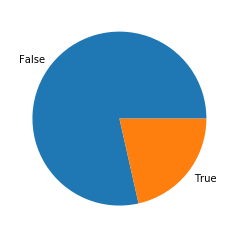

In [24]:
#在 361,183的貼文中，有 283628(78.5%) 貼文在話題版， 有 77555(21.5%)貼文在學校版
import matplotlib.pyplot as plt  

val_counts=artical_0901_1115['ISschool'].value_counts()
print(val_counts)

plt.pie(val_counts, labels = val_counts.index)
plt.show()

In [25]:
artical_0901_1115school = artical_0901_1115[artical_0901_1115['ISschool'] == True]
print("學校版 貼文 shape: ", artical_0901_1115school.shape)

學校版 貼文 shape:  (77555, 10)


In [26]:
artical_0901_1115topic = artical_0901_1115[artical_0901_1115['ISschool'] == False]
print("話題版 貼文 shape: ", artical_0901_1115topic.shape)

話題版 貼文 shape:  (283628, 10)


In [27]:
#存成utf8_sig格式的csv檔
artical_0901_1115school.to_csv("artical_0901_1115school.csv", encoding = "utf_8_sig")
artical_0901_1115topic.to_csv("artical_0901_1115topic.csv", encoding = "utf_8_sig")